### Make better regression models - just default or with cross validation and hyper parameter tuning

### Import dataset and split train and test sets

In [1]:
# import libraries
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# load dataset as pandas dataframe
df = pd.read_csv('boston.csv')
df = df.sample(frac=1, random_state = None)             # shuffle the rows just in case
print(df.shape)
df.head()

(506, 15)


,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
272,272,0.11460,20.0,6.96,0.0,0.464,6.538,58.7,3.9175,3.0,223.0,18.6,394.96,7.73,24.4
260,260,0.54011,20.0,3.97,0.0,0.647,7.203,81.8,2.1121,5.0,264.0,13.0,392.80,9.59,33.8
491,491,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,390.11,18.07,13.6
375,375,19.60910,0.0,18.10,0.0,0.671,7.313,97.9,1.3163,24.0,666.0,20.2,396.90,13.44,15.0
133,133,0.32982,0.0,21.89,0.0,0.624,5.822,95.4,2.4699,4.0,437.0,21.2,388.69,15.03,18.4


In [3]:
# determine range of explanatory variables X and target variable Y
start = 1
end   = 14
X = df.iloc[:, start:end]
y = df.iloc[:, end]

In [4]:
# split train and test in the fixed test size with random order
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = None)

In [5]:
# print(X_train, y_train)

### 1. Use default models

### Try multiple regressors
model list :    https://scikit-learn.org/stable/supervised_learning.html

In [6]:
# import regression models
from sklearn.ensemble import RandomForestRegressor                       # for Random Forest
from sklearn.linear_model import Ridge                                   # for Ridge
from sklearn.ensemble import GradientBoostingRegressor                   # for Gradient Boosting
from sklearn.gaussian_process import GaussianProcessRegressor            # for Gaussian Process
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.neural_network import MLPRegressor                          # for Multi layer Perceptron
from sklearn.svm import SVR                                              # for Support vector machine

In [7]:
# building Models (default condition)
randfr  = RandomForestRegressor().fit(X_train, y_train)                  # for Random Forest
ridger  = Ridge().fit(X_train, y_train)                                  # for Ridge
grdbtr  = GradientBoostingRegressor().fit(X_train, y_train)              # for Gradient Boosting
kernel  = DotProduct() + WhiteKernel()                                   # for Gaussian Process
gaussr  = GaussianProcessRegressor(kernel=kernel).fit(X_train, y_train)
mlpctr  = MLPRegressor().fit(X_train, y_train)                           # for Multi layer Perceptron
svmr    = SVR().fit(X_train, y_train)                                    # for Support vector machine

C:\Users\mmm\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\mmm\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\mmm\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [8]:
# import evaluation metrics for models
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# predicted value of X_test
y_pred_randf = randfr.predict(X_test)
y_pred_ridge = ridger.predict(X_test)
y_pred_grdbt = grdbtr.predict(X_test)
y_pred_gauss = gaussr.predict(X_test)
y_pred_mlpct = mlpctr.predict(X_test)
y_pred_svm   = svmr.predict(X_test)

# predicted value of X_train
y_obsv_randf = randfr.predict(X_train)
y_obsv_ridge = ridger.predict(X_train)
y_obsv_grdbt = grdbtr.predict(X_train)
y_obsv_gauss = gaussr.predict(X_train)
y_obsv_mlpct = mlpctr.predict(X_train)
y_obsv_svm   = svmr.predict(X_train)

# R2
R2_randf = r2_score(y_test, y_pred_randf)
R2_ridge = r2_score(y_test, y_pred_ridge)
R2_grdbt = r2_score(y_test, y_pred_grdbt)
R2_gauss = r2_score(y_test, y_pred_gauss)
R2_mlpct = r2_score(y_test, y_pred_mlpct)
R2_svm   = r2_score(y_test, y_pred_svm)

# score = R2
scr_randf = randfr.score(X_test, y_test)
scr_ridge = ridger.score(X_test, y_test)
scr_grdbt = grdbtr.score(X_test, y_test)
scr_gauss = gaussr.score(X_test, y_test)
scr_mlpct = mlpctr.score(X_test, y_test)
scr_svm   = svmr.score(X_test, y_test)

# RMSE
rsme_randf = np.sqrt(mean_squared_error(y_test, y_pred_randf))
rsme_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
rsme_grdbt = np.sqrt(mean_squared_error(y_test, y_pred_grdbt))
rsme_gauss = np.sqrt(mean_squared_error(y_test, y_pred_gauss))
rsme_mlpct = np.sqrt(mean_squared_error(y_test, y_pred_mlpct))
rsme_svm   = np.sqrt(mean_squared_error(y_test, y_pred_svm))

In [9]:
# print R square
print('                      test score      R2:')
print('Random Forest          = {:.4}'.format(scr_randf), '      {:.4}'.format(R2_randf))
print('Ridge                  = {:.4}'.format(scr_ridge), '      {:.4}'.format(R2_ridge))
print('Gradient Boosting      = {:.4}'.format(scr_grdbt), '      {:.4}'.format(R2_grdbt))
print('Gaussian Process       = {:.4}'.format(scr_gauss), '      {:.4}'.format(R2_gauss))
print('Multi Layer Perceptron = {:.4}'.format(scr_mlpct), '      {:.4}'.format(R2_mlpct))
print('SVM                    = {:.4}'.format(scr_svm),   '      {:.4}'.format(R2_svm))

                      test score      R2:
Random Forest          = 0.8847       0.8847
Ridge                  = 0.7845       0.7845
Gradient Boosting      = 0.9167       0.9167
Gaussian Process       = 0.7706       0.7706
Multi Layer Perceptron = 0.4401       0.4401
SVM                    = -0.01503       -0.01503


In [10]:
# print root mean square error (RMSE)
print('                          RMSE :')
print('Random Forest          = {:.5}'.format(rsme_randf))
print('Ridge                  = {:.5}'.format(rsme_ridge))
print('Gradient Boosting      = {:.5}'.format(rsme_grdbt))
print('Gaussian Process       = {:.5}'.format(rsme_gauss))
print('Multi Layer Perceptron = {:.5}'.format(rsme_mlpct))
print('SVM                    = {:.5}'.format(rsme_svm))

                          RMSE :
Random Forest          = 3.0198
Ridge                  = 4.1287
Gradient Boosting      = 2.567
Gaussian Process       = 4.2599
Multi Layer Perceptron = 6.6549
SVM                    = 8.9606


Residual plot


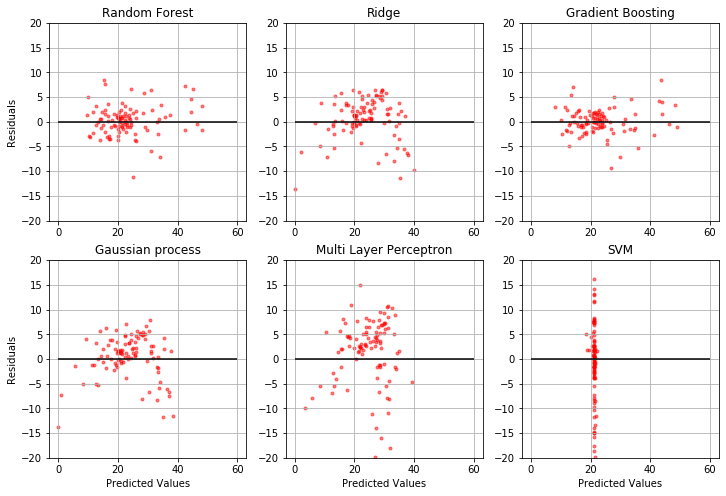

In [11]:
# draw residual plots of test set
print('Residual plot')

plt.figure(figsize=(12, 8))
plt.subplot(2,3,1)
plt.scatter(y_pred_randf, y_pred_randf - y_test, c='r', marker='.', alpha = 0.5)      
plt.hlines(y = 0, xmin = 0, xmax = 60, color='black'), plt.ylim(-20, 20)
plt.title('Random Forest'), plt.ylabel('Residuals'), plt.grid()
 
plt.subplot(2,3,2)
plt.scatter(y_pred_ridge, y_pred_ridge - y_test, c='r', marker='.', alpha = 0.5)      
plt.hlines(y = 0, xmin = 0, xmax = 60, color='black'), plt.ylim(-20, 20)
plt.title('Ridge'), plt.grid()      
 
plt.subplot(2,3,3)
plt.scatter(y_pred_grdbt, y_pred_grdbt - y_test, c='r', marker='.', alpha = 0.5)      
plt.hlines(y = 0, xmin = 0, xmax = 60, color='black'), plt.ylim(-20, 20)
plt.title('Gradient Boosting'), plt.grid()      
 
plt.subplot(2,3,4)
plt.scatter(y_pred_gauss, y_pred_gauss - y_test, c='r', marker='.', alpha = 0.5)      
plt.hlines(y = 0, xmin = 0, xmax = 60, color='black'), plt.ylim(-20, 20)
plt.title('Gaussian process'), plt.xlabel('Predicted Values'), plt.ylabel('Residuals'), plt.grid()      

plt.subplot(2,3,5)
plt.scatter(y_pred_mlpct, y_pred_mlpct - y_test, c='r', marker='.', alpha = 0.5)      
plt.hlines(y = 0, xmin = 0, xmax = 60, color='black'), plt.ylim(-20, 20)
plt.title('Multi Layer Perceptron'), plt.xlabel('Predicted Values'), plt.grid()

plt.subplot(2,3,6)
plt.scatter(y_pred_svm, y_pred_svm - y_test, c='r', marker='.', alpha = 0.5)      
plt.hlines(y = 0, xmin = 0, xmax = 60, color='black'), plt.ylim(-20, 20)
plt.title('SVM'), plt.xlabel('Predicted Values'), plt.grid()

plt.show()

Observed vs. Predicted values plot


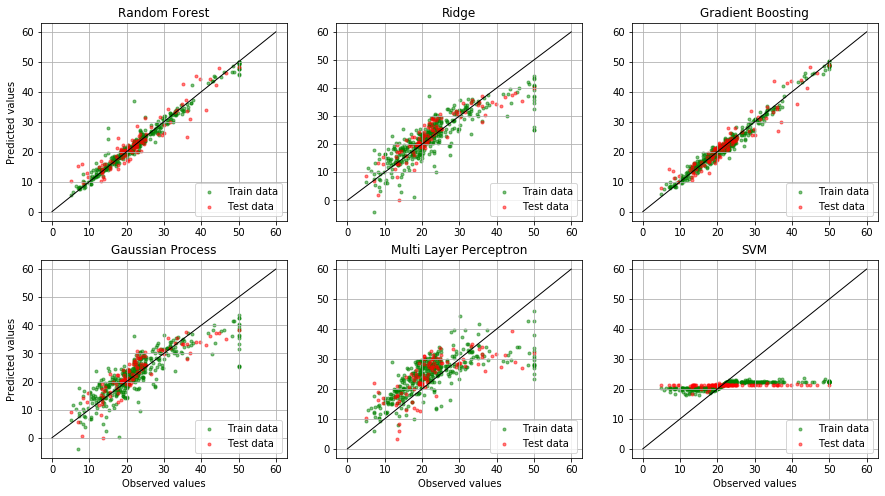

                      test score      RMSE:
Random Forest          = 0.8847       3.02
Ridge                  = 0.7845       4.129
Gradient Boosting      = 0.9167       2.567
Gaussian Process       = 0.7706       4.26
Multi Layer Perceptron = 0.4401       6.655
SVM                    = -0.01503       8.961


In [12]:
# draw observed and predicted values for both train and test sets
print('Observed vs. Predicted values plot')

x_obsv = (0, 60)
y_pred = (0, 60)

plt.figure(figsize = (15, 8))
plt.subplot(2, 3, 1)
plt.scatter(y_train, y_obsv_randf, c = 'g', marker = '.', alpha = 0.5, label = 'Train data')
plt.scatter(y_test,  y_pred_randf,  c = 'r', marker = '.', alpha = 0.5, label = 'Test data')
plt.plot([x_obsv[0], x_obsv[1]], [y_pred[0], y_pred[1]], color = "black", lw= 1), plt.legend(loc = 'lower right')
plt.title('Random Forest'), plt.ylabel('Predicted values'), plt.grid()

plt.subplot(2, 3, 2)
plt.scatter(y_train, y_obsv_ridge, c = 'g', marker = '.', alpha = 0.5, label = 'Train data')
plt.scatter(y_test,  y_pred_ridge,  c = 'r', marker = '.', alpha = 0.5, label = 'Test data')
plt.plot([x_obsv[0], x_obsv[1]], [y_pred[0], y_pred[1]], color = "black", lw= 1), plt.legend(loc = 'lower right')
plt.title('Ridge'), plt.grid()

plt.subplot(2, 3, 3)
plt.scatter(y_train, y_obsv_grdbt, c = 'g', marker = '.', alpha = 0.5, label = 'Train data')
plt.scatter(y_test,  y_pred_grdbt,  c = 'r', marker = '.', alpha = 0.5, label = 'Test data')
plt.plot([x_obsv[0], x_obsv[1]], [y_pred[0], y_pred[1]], color = "black", lw= 1), plt.legend(loc = 'lower right')
plt.title('Gradient Boosting'), plt.grid()

plt.subplot(2, 3, 4)
plt.scatter(y_train, y_obsv_gauss, c = 'g', marker = '.', alpha = 0.5, label = 'Train data')
plt.scatter(y_test,  y_pred_gauss,  c = 'r', marker = '.', alpha = 0.5, label = 'Test data')
plt.plot([x_obsv[0], x_obsv[1]], [y_pred[0], y_pred[1]], color = "black", lw= 1), plt.legend(loc = 'lower right')
plt.title('Gaussian Process'), plt.ylabel('Predicted values'), plt.xlabel('Observed values'), plt.grid()

plt.subplot(2, 3, 5)
plt.scatter(y_train, y_obsv_mlpct, c = 'g', marker = '.', alpha = 0.5, label = 'Train data')
plt.scatter(y_test,  y_pred_mlpct,  c = 'r', marker = '.', alpha = 0.5, label = 'Test data')
plt.plot([x_obsv[0], x_obsv[1]], [y_pred[0], y_pred[1]], color = "black", lw= 1), plt.legend(loc = 'lower right')
plt.title('Multi Layer Perceptron'), plt.xlabel('Observed values'), plt.grid()

plt.subplot(2, 3, 6)
plt.scatter(y_train, y_obsv_svm, c = 'g', marker = '.', alpha = 0.5, label = 'Train data')
plt.scatter(y_test,  y_pred_svm,  c = 'r', marker = '.', alpha = 0.5, label = 'Test data')
plt.plot([x_obsv[0], x_obsv[1]], [y_pred[0], y_pred[1]], color = "black", lw= 1), plt.legend(loc = 'lower right')
plt.title('SVM'), plt.xlabel('Observed values'), plt.grid()

plt.show()

# print R square and RMSE
print('                      test score      RMSE:')
print('Random Forest          = {:.4}'.format(scr_randf), '      {:.4}'.format(rsme_randf))
print('Ridge                  = {:.4}'.format(scr_ridge), '      {:.4}'.format(rsme_ridge))
print('Gradient Boosting      = {:.4}'.format(scr_grdbt), '      {:.4}'.format(rsme_grdbt))
print('Gaussian Process       = {:.4}'.format(scr_gauss), '      {:.4}'.format(rsme_gauss))
print('Multi Layer Perceptron = {:.4}'.format(scr_mlpct), '      {:.4}'.format(rsme_mlpct))
print('SVM                    = {:.4}'.format(scr_svm),   '      {:.4}'.format(rsme_svm))

### 2. Perform hyper parameter tuning using grid-search with cross validation

In [13]:
from sklearn.model_selection import GridSearchCV

random forest regressor : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [14]:
# grid search for Random Forest

parameters = {"n_estimators":[10, 30, 100, 300],
              "criterion":["mse","mae"],
              "max_depth":[1,3,10,30]}

grid_search = sklearn.model_selection.GridSearchCV(RandomForestRegressor(), parameters, cv=5)
randf_grds = grid_search.fit(X_train, y_train)

randf_best = randf_grds.best_estimator_                     # determine the best estimator
randf_grds.best_params_

C:\Users\mmm\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'criterion': 'mse', 'max_depth': 30, 'n_estimators': 300}

In [15]:
print('score: {:.2%}'.format(randf_best.score(X_test, y_test)))

score: 89.43%


Comparison of random forest default and tuned


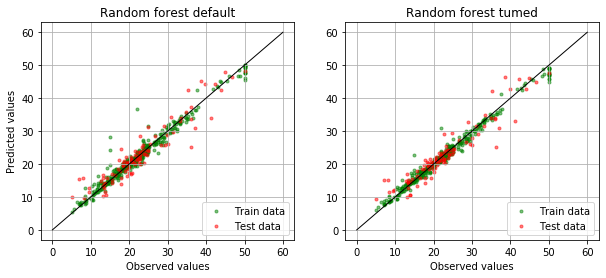

In [16]:
# draw random foest default and tuned
y_pred_randf_best   = randf_best.predict(X_test)  # predicted randf_best value of X_test
y_obsv_randf_best   = randf_best.predict(X_train) # predicted randf_best value of X_train

print('Comparison of random forest default and tuned')
plt.figure(figsize = (10, 4))
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_obsv_randf, c = 'g', marker = '.', alpha = 0.5, label = 'Train data')
plt.scatter(y_test,  y_pred_randf,  c = 'r', marker = '.', alpha = 0.5, label = 'Test data')
plt.plot([x_obsv[0], x_obsv[1]], [y_pred[0], y_pred[1]], color = "black", lw= 1), plt.legend(loc = 'lower right')
plt.title('Random forest default'), plt.xlabel('Observed values'), plt.ylabel('Predicted values'), plt.grid()

plt.subplot(1, 2, 2)
plt.scatter(y_train, y_obsv_randf_best, c = 'g', marker = '.', alpha = 0.5, label = 'Train data')
plt.scatter(y_test,  y_pred_randf_best,  c = 'r', marker = '.', alpha = 0.5, label = 'Test data')
plt.plot([x_obsv[0], x_obsv[1]], [y_pred[0], y_pred[1]], color = "black", lw= 1), plt.legend(loc = 'lower right')
plt.title('Random forest tumed'), plt.xlabel('Observed values'), plt.grid()

plt.show()

Ridge : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [17]:
# grid search for Ridge

parameters = {"alpha":[0.001, 0.003, 0.01, 0.03, 0.1],
              "normalize":['True','False'],
              "fit_intercept":['True', 'False']}

grid_search = sklearn.model_selection.GridSearchCV(Ridge(), parameters, cv=5)
ridge_grds = grid_search.fit(X_train, y_train)

ridge_best = ridge_grds.best_estimator_                     # determine the best estimator
ridge_grds.best_params_

{'alpha': 0.003, 'fit_intercept': 'True', 'normalize': 'True'}

In [18]:
print('score: {:.2%}'.format(ridge_best.score(X_test, y_test)))

score: 78.16%


gradient boosting regressor : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html

In [19]:
# grid search for Gradient boosting

parameters = {"loss":['ls','lad'], 
              "learning_rate":[0.01, 0.03, 0.1],
              "n_estimators":[10, 30, 100, 300, 1000],
              "criterion":["friedman_mse","mse"] }

grid_search = sklearn.model_selection.GridSearchCV(GradientBoostingRegressor(), parameters, cv=5)
grdbt_grds = grid_search.fit(X_train, y_train)

grdbt_best = grdbt_grds.best_estimator_                     # determine the best estimator
grdbt_grds.best_params_

{'criterion': 'mse', 'learning_rate': 0.1, 'loss': 'ls', 'n_estimators': 100}

In [20]:
print('score: {:.2%}'.format(grdbt_best.score(X_test, y_test)))

score: 91.70%


multi layer perceptron (MLP) : https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html

In [21]:
# grid search for MLP

parameters = {"hidden_layer_sizes":[(100,100),(100,200,100),(100,200,200,100)],              
              "activation":['tanh','relu'],
              "solver":['adam'],
              "max_iter":[10000],
              "batch_size":['auto']}

grid_search = sklearn.model_selection.GridSearchCV(MLPRegressor(), parameters, cv=5)
mlpct_grds = grid_search.fit(X_train, y_train)

mlpct_best = mlpct_grds.best_estimator_                     # determine the best estimator
mlpct_grds.best_params_

C:\Users\mmm\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'activation': 'tanh',
 'batch_size': 'auto',
 'hidden_layer_sizes': (100, 100),
 'max_iter': 10000,
 'solver': 'adam'}

In [22]:
print('score: {:.2%}'.format(mlpct_best.score(X_test, y_test)))

score: 65.09%


SVM : https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

In [23]:
# grid search for SVM regressor
from sklearn.model_selection import GridSearchCV

parameters = {"kernel":['rbf'],              
              "gamma":[0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1],              
              "C":[10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0, 10000.0],
              "epsilon":[0.01, 0.03, 0.1, 0.3, 1.0]}

grid_search = sklearn.model_selection.GridSearchCV(SVR(), parameters, cv=5)
svm_grds = grid_search.fit(X_train, y_train)

svm_best = svm_grds.best_estimator_                     # determine the best estimator
svm_grds.best_params_

C:\Users\mmm\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 1000.0, 'epsilon': 1.0, 'gamma': 0.0001, 'kernel': 'rbf'}

In [24]:
print('score: {:.2%}'.format(svm_best.score(X_test, y_test)))

score: 81.37%


Comparison of SVM default and tuned


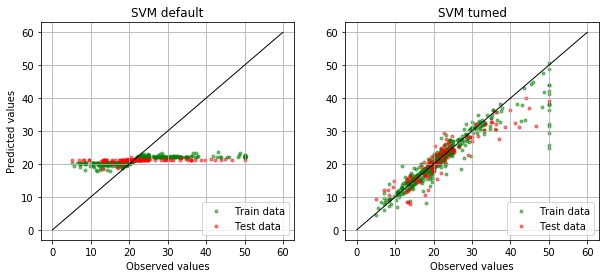

In [25]:
# draw svm default and svm tuned
y_pred_svm_best   = svm_best.predict(X_test)  # predicted svm_best value of X_test
y_obsv_svm_best   = svm_best.predict(X_train) # predicted svm_best value of X_train

print('Comparison of SVM default and tuned')
plt.figure(figsize = (10, 4))
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_obsv_svm, c = 'g', marker = '.', alpha = 0.5, label = 'Train data')
plt.scatter(y_test,  y_pred_svm,  c = 'r', marker = '.', alpha = 0.5, label = 'Test data')
plt.plot([x_obsv[0], x_obsv[1]], [y_pred[0], y_pred[1]], color = "black", lw= 1), plt.legend(loc = 'lower right')
plt.title('SVM default'), plt.xlabel('Observed values'), plt.ylabel('Predicted values'), plt.grid()

plt.subplot(1, 2, 2)
plt.scatter(y_train, y_obsv_svm_best, c = 'g', marker = '.', alpha = 0.5, label = 'Train data')
plt.scatter(y_test,  y_pred_svm_best,  c = 'r', marker = '.', alpha = 0.5, label = 'Test data')
plt.plot([x_obsv[0], x_obsv[1]], [y_pred[0], y_pred[1]], color = "black", lw= 1), plt.legend(loc = 'lower right')
plt.title('SVM tumed'), plt.xlabel('Observed values'), plt.grid()

plt.show()

In [26]:
# case of SVM using linear kernel
svm_linear = SVR(kernel='linear', C=1.0, epsilon=0.2).fit(X_train, y_train)

In [27]:
print('score: {:.2%}'.format(svm_linear.score(X_test, y_test)))

score: 79.96%


Comparison of SVM default and linear


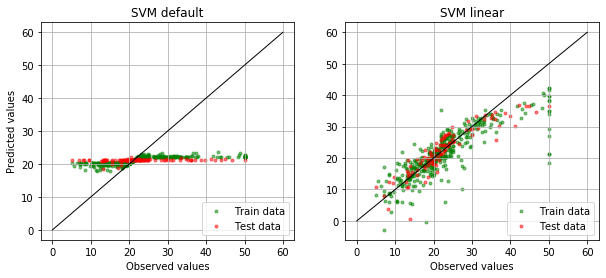

In [28]:
# draw svm default and svm linear
y_pred_svm_linear   = svm_linear.predict(X_test)  # predicted svm_linear value of X_test
y_obsv_svm_linear   = svm_linear.predict(X_train) # predicted svm_linear value of X_train

print('Comparison of SVM default and linear')
plt.figure(figsize = (10, 4))
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_obsv_svm, c = 'g', marker = '.', alpha = 0.5, label = 'Train data')
plt.scatter(y_test,  y_pred_svm,  c = 'r', marker = '.', alpha = 0.5, label = 'Test data')
plt.plot([x_obsv[0], x_obsv[1]], [y_pred[0], y_pred[1]], color = "black", lw= 1), plt.legend(loc = 'lower right')
plt.title('SVM default'), plt.xlabel('Observed values'), plt.ylabel('Predicted values'), plt.grid()

plt.subplot(1, 2, 2)
plt.scatter(y_train, y_obsv_svm_linear, c = 'g', marker = '.', alpha = 0.5, label = 'Train data')
plt.scatter(y_test,  y_pred_svm_linear,  c = 'r', marker = '.', alpha = 0.5, label = 'Test data')
plt.plot([x_obsv[0], x_obsv[1]], [y_pred[0], y_pred[1]], color = "black", lw= 1), plt.legend(loc = 'lower right')
plt.title('SVM linear'), plt.xlabel('Observed values'), plt.grid()

plt.show()